# NumPy Basics: Arrays and Vectorized Computation

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

- NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy's library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.

- NumPy operations perform complex computations on entire arrays without the need for Python for loops, which can be slow for large sequences. NumPy is faster than regular Python code because its C-based algorithms avoid overhead present with regular interpreted Python code.

In [1]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

In [3]:
%timeit my_arr2 = my_arr * 2

571 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%timeit my_list2 = my_list * 2

7.68 ms ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 1. The NumPy ndarray

In [9]:
data = np.array([[1.5, -3, 10], [0, -0.1, 6.5]])
data

array([[ 1.5, -3. , 10. ],
       [ 0. , -0.1,  6.5]])

In [10]:
data * 10

array([[ 15., -30., 100.],
       [  0.,  -1.,  65.]])

In [11]:
data + data

array([[ 3. , -6. , 20. ],
       [ 0. , -0.2, 13. ]])

Note: In this chapter and throughout the book, I use the standard NumPy convention of always using import numpy as np. It would be possible to put from numpy import * in your code to avoid having to write np., but I advise against making a habit of this. The numpy namespace is large and contains a number of functions whose names conflict with built-in Python functions (like min and max). Following standard conventions like these is almost always a good idea.

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array

In [12]:
data.shape

(2, 3)

In [13]:
data.dtype

dtype('float64')

In [14]:
data.ndim

2

## 1.1 Creating ndarrays

In [15]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [16]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [17]:
np.empty((6,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

Caution:
It’s not safe to assume that numpy.empty will return an array of all zeros. This function returns uninitialized memory and thus may contain nonzero "garbage" values. You should use this function only if you intend to populate the new array with data.

In [19]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
my_2d_list = [[1,0],[0,1]]
my_2d_arr = np.asarray(my_2d_list)
my_2d_arr

array([[1, 0],
       [0, 1]])

In [21]:
np.ones_like(my_2d_arr)

array([[1, 1],
       [1, 1]])

In [22]:
np.zeros_like(my_2d_arr)

array([[0, 0],
       [0, 0]])

In [24]:
np.full((4,4), fill_value=8)

array([[8, 8, 8, 8],
       [8, 8, 8, 8],
       [8, 8, 8, 8],
       [8, 8, 8, 8]])

In [26]:
np.full_like(my_2d_arr, fill_value=5)

array([[5, 5],
       [5, 5]])

In [28]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [32]:
np.identity(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

## 1.2 Data Types for ndarrays

Data types are a source of NumPy's flexibility for interacting with data coming from other systems. In most cases they provide a mapping directly onto an underlying disk or memory representation, which makes it possible to read and write binary streams of data to disk and to connect to code written in a low-level language like C or FORTRAN. The numerical data types are named the same way: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64. 

<h2>Data Type Mapping</h2>

<table>
    <tr>
        <th>Type</th>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>int8, uint8</td>
        <td>i1, u1</td>
        <td>Signed and unsigned 8-bit (1 byte) integer types</td>
    </tr>
    <tr>
        <td>int16, uint16</td>
        <td>i2, u2</td>
        <td>Signed and unsigned 16-bit integer types</td>
    </tr>
    <tr>
        <td>int32, uint32</td>
        <td>i4, u4</td>
        <td>Signed and unsigned 32-bit integer types</td>
    </tr>
    <tr>
        <td>int64, uint64</td>
        <td>i8, u8</td>
        <td>Signed and unsigned 64-bit integer types</td>
    </tr>
    <tr>
        <td>float16</td>
        <td>f2</td>
        <td>Half-precision floating point</td>
    </tr>
    <tr>
        <td>float32</td>
        <td>f4 or f</td>
        <td>Standard single-precision floating point; compatible with C float</td>
    </tr>
    <tr>
        <td>float64</td>
        <td>f8 or d</td>
        <td>Standard double-precision floating point; compatible with C double and Python float object</td>
    </tr>
    <tr>
        <td>float128</td>
        <td>f16 or g</td>
        <td>Extended-precision floating point</td>
    </tr>
    <tr>
        <td>complex64, complex128, complex256</td>
        <td>c8, c16, c32</td>
        <td>Complex numbers represented by two 32, 64, or 128 floats, respectively</td>
    </tr>
    <tr>
        <td>bool</td>
        <td>?</td>
        <td>Boolean type storing True and False values</td>
    </tr>
    <tr>
        <td>object</td>
        <td>O</td>
        <td>Python object type; a value can be any Python object</td>
    </tr>
    <tr>
        <td>string_</td>
        <td>S</td>
        <td>Fixed-length ASCII string type (1 byte per character); for example, to create a string data type with length 10, use 'S10'</td>
    </tr>
    <tr>
        <td>unicode_</td>
        <td>U</td>
        <td>Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10')</td>
    </tr>
</table>


In [35]:
arr = np.arange(1,6)
arr.dtype

dtype('int64')

In [36]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [38]:
random_arr = np.random.rand(5)
random_arr

array([0.12072616, 0.54200818, 0.77124763, 0.24901243, 0.48645821])

In [39]:
random_arr.astype(np.int64)

array([0, 0, 0, 0, 0])

In [42]:
num_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)

num_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

<b>Caution:</b><br>
Be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.

There are shorthand type code strings you can also use to refer to a dtype:

In [43]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [47]:
ones_string = np.ones(8, dtype="S1")
ones_string

array([b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1'], dtype='|S1')

## 1.3 Arithmetic with NumPy Arrays

In [49]:
arr = np.array([list(range(1,4)), list(range(4,7))])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
arr1 = np.array([np.arange(1,4), np.arange(4,7)])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
arr * arr1

array([[ 1,  4,  9],
       [16, 25, 36]])

In [55]:
arr - arr1

array([[0, 0, 0],
       [0, 0, 0]])

In [56]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [58]:
arr ** 3

array([[  1,   8,  27],
       [ 64, 125, 216]])

In [60]:
arr1 >= arr

array([[ True,  True,  True],
       [ True,  True,  True]])

Evaluating operations between differently sized arrays is called broadcasting

## 1.4 Basic Indexing and Slicing

In [69]:
arr = np.arange(1,10,2)
arr

array([1, 3, 5, 7, 9])

In [71]:
arr[2]

5

In [72]:
arr[2:4]

array([5, 7])

In [74]:
arr[2:4] = 12
arr

array([ 1,  3, 12, 12,  9])

<b>Note</b><br>
An important first distinction from Python's built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [75]:
arr_slice = arr[0:2]
arr_slice

array([1, 3])

In [76]:
arr_slice[1] = 532
arr

array([  1, 532,  12,  12,   9])

In [77]:
arr_slice[:] = 64
arr

array([64, 64, 12, 12,  9])

<b>Caution</b><br>
If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, <code style="background-color:#F6F6F6;border-radius:4;color:#9753B8">arr[5:8].copy()</code>. As you will see, pandas works this way, too.

In [79]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [80]:
arr2d[0][2]

3

In [81]:
arr2d[0,2]

3

In [87]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [88]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
old_values = arr3d[0].copy()

arr3d[0] = 32
arr3d

array([[[32, 32, 32],
        [32, 32, 32]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [90]:
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [92]:
arr3d[1, 0]

array([7, 8, 9])

In [93]:
arr3d[1, 0, 0]

7

In [94]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [95]:
x[0]

array([7, 8, 9])

In [96]:
x[0, 1]

8

In [100]:
list2d = [[1, 2, 3], [4, 5, 6]]
list2d

[[1, 2, 3], [4, 5, 6]]

<b>Caution</b><br>
This multidimensional indexing syntax for NumPy arrays will <b>not</b> work with regular Python objects, such as lists of lists.

In [102]:
list2d[1][2]

6

In [103]:
list2d[1, 2]

TypeError: list indices must be integers or slices, not tuple

In [106]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [107]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [108]:
arr2d[:2, :2]

array([[1, 2],
       [4, 5]])

In [109]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

## 1.5 Boolean Indexing

In [110]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],[-12, -4], [3, 4]])

In [111]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [112]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [114]:
data[names == "Joe"]

array([[  0,   2],
       [-12,  -4],
       [  3,   4]])

In [115]:
data[names == "Joe", 1]

array([ 2, -4,  4])

In [116]:
data[names == "Joe", 1:]

array([[ 2],
       [-4],
       [ 4]])

In [117]:
data[[ True, False, False,  True, False, False, False]]

array([[4, 7],
       [0, 0]])

In [118]:
data[True]

array([[[  4,   7],
        [  0,   2],
        [ -5,   6],
        [  0,   0],
        [  1,   2],
        [-12,  -4],
        [  3,   4]]])

In [119]:
data[False]

array([], shape=(0, 7, 2), dtype=int64)

The Boolean array must be of the same length as the array axis it’s indexing.

In [120]:
data[[True, False]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 2

In [121]:
data[names != "Bob"]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [122]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [123]:
~data[~(names == "Bob")]

array([[-1, -3],
       [ 4, -7],
       [-2, -3],
       [11,  3],
       [-4, -5]])

In [124]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [125]:
mask = (names == "Bob") | (names == "Will")
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [126]:
mask

array([ True, False,  True,  True,  True, False, False])

In [127]:
mask = (names == "Bob") & (names == "Will")
mask

array([False, False, False, False, False, False, False])

<b>Caution</b><br>
The Python keywords and and or do not work with Boolean arrays. Use & (and) and | (or) instead.

In [128]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [129]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

## 1.6 Fancy Indexing

In [132]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i + 1
    
arr

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.],
       [8., 8., 8., 8.]])

To select a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [133]:
arr[[2, 4, 6, 0]]

array([[3., 3., 3., 3.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [1., 1., 1., 1.]])

In [134]:
arr[[-6, -3, -1]]

array([[3., 3., 3., 3.],
       [6., 6., 6., 6.],
       [8., 8., 8., 8.]])

In [138]:
arr = np.arange(1, 10).reshape((3, 3))
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [139]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [140]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In this case the first index value is an list of the rows selected but the second list determines the order of the rows:

In [147]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 1.7 Transposing Arrays and Swapping Axes

In [148]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [149]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [156]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [157]:
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [158]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [159]:
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

# 2. Pseudorandom Number Generation

In [161]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.40187167,  2.49914724,  0.96438334,  0.05034948],
       [-2.84917917,  1.41504491, -0.32400285, -0.10206837],
       [-0.6498498 ,  0.13825629, -0.55348273,  0.37200889],
       [-0.38236299, -0.38249803, -0.70259081,  0.94609215]])

<h2>Random Number Generation Methods</h2>

<table>
    <tr>
        <th>Method</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>permutation</td>
        <td>Return a random permutation of a sequence, or return a permuted range</td>
    </tr>
    <tr>
        <td>shuffle</td>
        <td>Randomly permute a sequence in place</td>
    </tr>
    <tr>
        <td>uniform</td>
        <td>Draw samples from a uniform distribution</td>
    </tr>
    <tr>
        <td>integers</td>
        <td>Draw random integers from a given low-to-high range</td>
    </tr>
    <tr>
        <td>standard_normal</td>
        <td>Draw samples from a normal distribution with mean 0 and standard deviation 1</td>
    </tr>
    <tr>
        <td>binomial</td>
        <td>Draw samples from a binomial distribution</td>
    </tr>
    <tr>
        <td>normal</td>
        <td>Draw samples from a normal (Gaussian) distribution</td>
    </tr>
    <tr>
        <td>beta</td>
        <td>Draw samples from a beta distribution</td>
    </tr>
    <tr>
        <td>chisquare</td>
        <td>Draw samples from a chi-square distribution</td>
    </tr>
    <tr>
        <td>gamma</td>
        <td>Draw samples from a gamma distribution</td>
    </tr>
    <tr>
        <td>uniform</td>
        <td>Draw samples from a uniform [0, 1) distribution</td>
    </tr>
</table>

# 3. Universal Functions: Fast Element-Wise Array Function

In [162]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [163]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [164]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [165]:
rng = np.random.default_rng(seed=12345)

In [166]:
x = rng.standard_normal(8)
x

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465, -1.3677927 ,  0.6488928 ])

In [167]:
y = rng.standard_normal(8)
y

array([ 0.36105811, -1.95286306,  2.34740965,  0.96849691, -0.75938718,
        0.90219827, -0.46695317, -0.06068952])

In [168]:
np.maximum(x, y)

array([ 0.36105811,  1.26372846,  2.34740965,  0.96849691, -0.07534331,
        0.90219827, -0.46695317,  0.6488928 ])

In [169]:
np.add(x, y)

array([-1.06276692, -0.6891346 ,  1.47674792,  0.70932367, -0.83473049,
        0.16131362, -1.83474588,  0.58820328])

In [170]:
arr = rng.standard_normal(7) * 5
arr

array([ 3.94422172, -6.28334067,  2.87928757,  6.99489497,  6.6114903 ,
       -1.49849258,  4.51459671])

In [171]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.94422172, -0.28334067,  0.87928757,  0.99489497,  0.6114903 ,
       -0.49849258,  0.51459671])

In [172]:
whole_part

array([ 3., -6.,  2.,  6.,  6., -1.,  4.])

In [173]:
arr

array([ 3.94422172, -6.28334067,  2.87928757,  6.99489497,  6.6114903 ,
       -1.49849258,  4.51459671])

In [174]:
out_arr = np.zeros_like(arr)
np.add(arr, 1, out=out_arr)

array([ 4.94422172, -5.28334067,  3.87928757,  7.99489497,  7.6114903 ,
       -0.49849258,  5.51459671])

In [176]:
out_arr

array([ 4.94422172, -5.28334067,  3.87928757,  7.99489497,  7.6114903 ,
       -0.49849258,  5.51459671])

<h2>Some unary universal functions</h2>

<table>
    <tr>
        <th>Function</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>abs, fabs</code></td>
        <td>Compute the absolute value element-wise for integer, floating-point, or complex values</td>
    </tr>
    <tr>
        <td><code>sqrt</code></td>
        <td>Compute the square root of each element (equivalent to arr ** 0.5)</td>
    </tr>
    <tr>
        <td><code>square</code></td>
        <td>Compute the square of each element (equivalent to arr ** 2)</td>
    </tr>
    <tr>
        <td><code>exp</code></td>
        <td>Compute the exponent ex of each element</td>
    </tr>
    <tr>
        <td><code>log, log10, log2, log1p</code></td>
        <td>Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively</td>
    </tr>
    <tr>
        <td><code>sign</code></td>
        <td>Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)</td>
    </tr>
    <tr>
        <td><code>ceil</code></td>
        <td>Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)</td>
    </tr>
    <tr>
        <td><code>floor</code></td>
        <td>Compute the floor of each element (i.e., the largest integer less than or equal to each element)</td>
    </tr>
    <tr>
        <td><code>rint</code></td>
        <td>Round elements to the nearest integer, preserving the dtype</td>
    </tr>
    <tr>
        <td><code>modf</code></td>
        <td>Return fractional and integral parts of array as separate arrays</td>
    </tr>
    <tr>
        <td><code>isnan</code></td>
        <td>Return Boolean array indicating whether each value is NaN (Not a Number)</td>
    </tr>
    <tr>
        <td><code>isfinite, isinf</code></td>
        <td>Return Boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively</td>
    </tr>
    <tr>
        <td><code>cos, cosh, sin, sinh, tan, tanh</code></td>
        <td>Regular and hyperbolic trigonometric functions</td>
    </tr>
    <tr>
        <td><code>arccos, arccosh, arcsin, arcsinh, arctan, arctanh</code></td>
        <td>Inverse trigonometric functions</td>
    </tr>
    <tr>
        <td><code>logical_not</code></td>
        <td>Compute truth value of not x element-wise (equivalent to ~arr)</td>
    </tr>
</table>

<h2>Some binary universal functions</h2>

<table>
    <tr>
        <th>Function</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>add</code></td>
        <td>Add corresponding elements in arrays</td>
    </tr>
    <tr>
        <td><code>subtract</code></td>
        <td>Subtract elements in second array from first array</td>
    </tr>
    <tr>
        <td><code>multiply</code></td>
        <td>Multiply array elements</td>
    </tr>
    <tr>
        <td><code>divide, floor_divide</code></td>
        <td>Divide or floor divide (truncating the remainder)</td>
    </tr>
    <tr>
        <td><code>power</code></td>
        <td>Raise elements in first array to powers indicated in second array</td>
    </tr>
    <tr>
        <td><code>maximum, fmax</code></td>
        <td>Element-wise maximum; fmax ignores NaN</td>
    </tr>
    <tr>
        <td><code>minimum, fmin</code></td>
        <td>Element-wise minimum; fmin ignores NaN</td>
    </tr>
    <tr>
        <td><code>mod</code></td>
        <td>Element-wise modulus (remainder of division)</td>
    </tr>
    <tr>
        <td><code>copysign</code></td>
        <td>Copy sign of values in second argument to values in first argument</td>
    </tr>
    <tr>
        <td><code>greater, greater_equal, less, less_equal, equal, not_equal</code></td>
        <td>Perform element-wise comparison, yielding Boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)</td>
    </tr>
    <tr>
        <td><code>logical_and</code></td>
        <td>Compute element-wise truth value of AND (&) logical operation</td>
    </tr>
    <tr>
        <td><code>logical_or</code></td>
        <td>Compute element-wise truth value of OR (|) logical operation</td>
    </tr>
    <tr>
        <td><code>logical_xor</code></td>
        <td>Compute element-wise truth value of XOR (^) logical operation</td>
    </tr>
</table>

# 4. Array-Oriented Programming with Arrays

In [191]:
points = np.arange(-5, 5, 0.01).astype('float16')

In [181]:
points.dtype

dtype('float16')

In [182]:
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]], dtype=float16)

In [183]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]], dtype=float16)

In [185]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07 , 7.062, 7.06 , ..., 7.05 , 7.06 , 7.062],
       [7.062, 7.055, 7.05 , ..., 7.04 , 7.05 , 7.055],
       [7.06 , 7.05 , 7.043, ..., 7.035, 7.043, 7.05 ],
       ...,
       [7.05 , 7.04 , 7.035, ..., 7.027, 7.035, 7.04 ],
       [7.06 , 7.05 , 7.043, ..., 7.035, 7.043, 7.05 ],
       [7.062, 7.055, 7.05 , ..., 7.04 , 7.05 , 7.055]], dtype=float16)

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

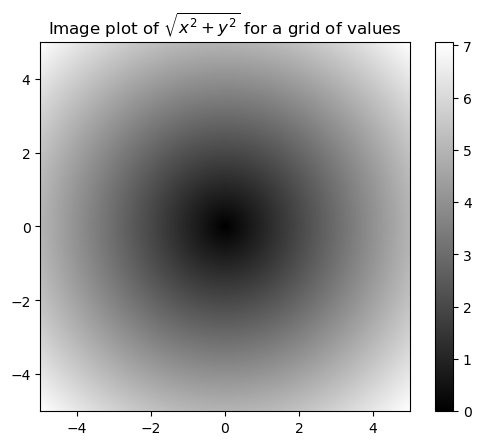

In [189]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

<b>Note</b><br>
The term vectorization is used to describe some other computer science concepts, but in this book I use it to describe operations on whole arrays of data at once rather than going value by value using a Python for loop.

## 4.1 Expressing Conditional Logic as Arrays Operations

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [197]:
xarr = np.random.rand(5).astype('float16')

yarr = np.random.rand(5).astype('float16')

cond = np.random.rand(5).astype('?')

In [198]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[0.475, 0.715, 0.1948, 0.07355, 0.986]

In [199]:
result = np.where(cond, xarr, yarr)
result

array([0.475  , 0.715  , 0.1948 , 0.07355, 0.986  ], dtype=float16)

In [200]:
arr = rng.standard_normal((4, 4))
arr

array([[-1.62158273, -0.15818926,  0.44948393, -1.34360107],
       [-0.08168759,  1.72473993,  2.61815943,  0.77736134],
       [ 0.8286332 , -0.95898831, -1.20938829, -1.41229201],
       [ 0.54154683,  0.7519394 , -0.65876032, -1.22867499]])

In [201]:
arr > 0

array([[False, False,  True, False],
       [False,  True,  True,  True],
       [ True, False, False, False],
       [ True,  True, False, False]])

In [202]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2],
       [-2,  2,  2,  2],
       [ 2, -2, -2, -2],
       [ 2,  2, -2, -2]])

In [203]:
np.where(arr > 0, 2, arr)

array([[-1.62158273, -0.15818926,  2.        , -1.34360107],
       [-0.08168759,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.95898831, -1.20938829, -1.41229201],
       [ 2.        ,  2.        , -0.65876032, -1.22867499]])

## 4.2 Mathematical and Statistical Methods

In [205]:
arr = rng.standard_normal((4, 4))
arr

array([[ 0.25755777,  0.31290292, -0.13081169,  1.26998312],
       [-0.09296246, -0.06615089, -1.10821447,  0.13595685],
       [ 1.34707776,  0.06114402,  0.0709146 ,  0.43365454],
       [ 0.27748366,  0.53025239,  0.53672097,  0.61835001]])

In [206]:
np.mean(arr)

0.27836619417849834

In [207]:
np.sum(arr)

4.453859106855973

In [208]:
arr.mean()

0.27836619417849834

In [209]:
arr.sum()

4.453859106855973

In [210]:
arr.mean(axis=1)

array([ 0.42740803, -0.28284274,  0.47819773,  0.49070176])

In [211]:
arr.mean(axis=0)

array([ 0.44728918,  0.20953711, -0.15784765,  0.61448613])

In [212]:
arr.sum(axis=1)

array([ 1.70963212, -1.13137096,  1.91279092,  1.96280703])

In [213]:
arr.sum(axis=0)

array([ 1.78915673,  0.83814844, -0.63139059,  2.45794452])

In [216]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [218]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [219]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [220]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

## 4.3 Methods for Boolean Arrays

In [221]:
arr = rng.standard_normal(100)

(arr > 0).sum()

49

In [222]:
(arr <= 0).sum()

51

In [223]:
arr > 0

array([False,  True, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True, False, False, False,  True,  True, False,  True,
        True])

In [224]:
bools = np.array([False, True, True, False, True])

bools.any()

True

In [225]:
bools.all()

False

## 4.4 Sorting

In [228]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.75539067, -1.15912585,  2.15031011],
       [-0.15027022, -0.16116428, -1.07944248],
       [ 0.87796618,  0.22446741, -0.59159345],
       [ 0.2262628 ,  0.68618251,  1.21500461],
       [ 0.21605944, -0.96482356, -0.5566078 ]])

In [230]:
arr.sort(axis=0)
arr

array([[-0.15027022, -1.15912585, -1.07944248],
       [ 0.21605944, -0.96482356, -0.59159345],
       [ 0.2262628 , -0.16116428, -0.5566078 ],
       [ 0.75539067,  0.22446741,  1.21500461],
       [ 0.87796618,  0.68618251,  2.15031011]])

In [232]:
arr.sort(axis=1)
arr

array([[-1.15912585, -1.07944248, -0.15027022],
       [-0.96482356, -0.59159345,  0.21605944],
       [-0.5566078 , -0.16116428,  0.2262628 ],
       [ 0.22446741,  0.75539067,  1.21500461],
       [ 0.68618251,  0.87796618,  2.15031011]])

<code>np.sort()</code> returns a copy for passed sorted array

In [233]:
arr = rng.standard_normal((5, 3))
np.sort(arr)

array([[-2.29838764, -0.73208213,  0.7364691 ],
       [-0.34143629, -0.10787605,  0.46571672],
       [ 0.28224121,  0.90954639,  1.58453379],
       [-0.66937652,  0.39507157,  1.55536898],
       [-1.23813903, -1.19617346, -0.42914951]])

In [234]:
arr

array([[-2.29838764, -0.73208213,  0.7364691 ],
       [ 0.46571672, -0.10787605, -0.34143629],
       [ 1.58453379,  0.28224121,  0.90954639],
       [ 0.39507157, -0.66937652,  1.55536898],
       [-1.23813903, -1.19617346, -0.42914951]])

## 4.5 Unique and Other Set Logic

<code>np.unique(array)</code> returns a sorted array with the unique items

In [235]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [236]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

np.unique(ints)

array([1, 2, 3, 4])

Python alternative:

In [237]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list.

<h2>Array Set Operations</h2>

<table>
    <tr>
        <th><code>Method</code></th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>unique(x)</code></td>
        <td>Compute the sorted, unique elements in x</td>
    </tr>
    <tr>
        <td><code>intersect1d(x, y)</code></td>
        <td>Compute the sorted, common elements in x and y</td>
    </tr>
    <tr>
        <td><code>union1d(x, y)</code></td>
        <td>Compute the sorted union of elements</td>
    </tr>
    <tr>
        <td><code>in1d(x, y)</code></td>
        <td>Compute a Boolean array indicating whether each element of x is contained in y</td>
    </tr>
    <tr>
        <td><code>setdiff1d(x, y)</code></td>
        <td>Set difference, elements in x that are not in y</td>
    </tr>
    <tr>
        <td><code>setxor1d(x, y)</code></td>
        <td>Set symmetric differences; elements that are in either of the arrays, but not both</td>
    </tr>
</table>

# 5. File Input and Output with Arrays

<code>numpy.save</code> and <code>numpy.load</code> are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [238]:
arr = np.arange(10)

np.save("some_array", arr)

In [239]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [240]:
np.savez("array_archive.npz", a=arr, b=arr)

In [241]:
arch = np.load("array_archive.npz")

arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [242]:
arch

NpzFile 'array_archive.npz' with keys: a, b

# 6. Linear Algebra

In [246]:
x = np.arange(6).reshape((3, 2))
y = np.arange(8).reshape((2, 4))

x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [247]:
y

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [249]:
x @ y

array([[ 4,  5,  6,  7],
       [12, 17, 22, 27],
       [20, 29, 38, 47]])

In [250]:
np.dot(x, y)

array([[ 4,  5,  6,  7],
       [12, 17, 22, 27],
       [20, 29, 38, 47]])

In [251]:
x.dot(y)

array([[ 4,  5,  6,  7],
       [12, 17, 22, 27],
       [20, 29, 38, 47]])

In [265]:
from numpy.linalg import inv, qr

X = rng.standard_normal((5, 5))

In [266]:
mat = X.T @ X

In [267]:
inv(mat)

array([[  5.4755939 ,   4.82719485,  14.00262023, -16.92859212,
         17.18430654],
       [  4.82719485,   5.18449275,  13.02261242, -15.92387568,
         15.9811525 ],
       [ 14.00262023,  13.02261242,  37.27115446, -44.93508608,
         45.48194869],
       [-16.92859212, -15.92387568, -44.93508608,  54.65071429,
        -55.06163996],
       [ 17.18430654,  15.9811525 ,  45.48194869, -55.06163996,
         55.77310104]])

In [268]:
mat

array([[ 6.09227484,  0.91698401,  0.36633341, -0.25999821, -2.69526818],
       [ 0.91698401,  2.03338355,  0.3377165 ,  0.94640951, -0.20624085],
       [ 0.36633341,  0.3377165 ,  5.69339976,  0.77485925, -4.0875292 ],
       [-0.25999821,  0.94640951,  0.77485925,  4.02813473,  3.15379218],
       [-2.69526818, -0.20624085, -4.0875292 ,  3.15379218,  7.35433455]])

In [270]:
(mat @ inv(mat)).astype('float16')

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  1., -0.],
       [ 0., -0.,  0.,  0.,  1.]], dtype=float16)

<h2>Commonly used <code>numpy.linalg</code> functions</h2>

<table>
    <tr>
        <th><code>Function</code></th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>diag</code></td>
        <td>Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal</td>
    </tr>
    <tr>
        <td><code>dot</code></td>
        <td>Matrix multiplication</td>
    </tr>
    <tr>
        <td><code>trace</code></td>
        <td>Compute the sum of the diagonal elements</td>
    </tr>
    <tr>
        <td><code>det</code></td>
        <td>Compute the matrix determinant</td>
    </tr>
    <tr>
        <td><code>eig</code></td>
        <td>Compute the eigenvalues and eigenvectors of a square matrix</td>
    </tr>
    <tr>
        <td><code>inv</code></td>
        <td>Compute the inverse of a square matrix</td>
    </tr>
    <tr>
        <td><code>pinv</code></td>
        <td>Compute the Moore-Penrose pseudoinverse of a matrix</td>
    </tr>
    <tr>
        <td><code>qr</code></td>
        <td>Compute the QR decomposition</td>
    </tr>
    <tr>
        <td><code>svd</code></td>
        <td>Compute the singular value decomposition (SVD)</td>
    </tr>
    <tr>
        <td><code>solve</code></td>
        <td>Solve the linear system Ax = b for x, where A is a square matrix</td>
    </tr>
    <tr>
        <td><code>lstsq</code></td>
        <td>Compute the least-squares solution to Ax = b</td>
    </tr>
</table>